### WineData

In [40]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Proline')

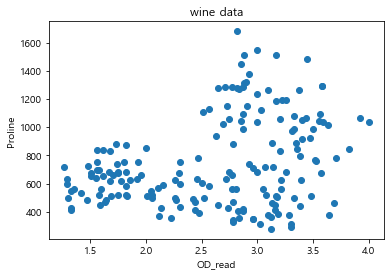

In [41]:
wine_df = pd.read_csv('wine_data.csv')
#시각화
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title('wine data')
plt.xlabel('OD_read')
plt.ylabel('Proline')

### K-Means

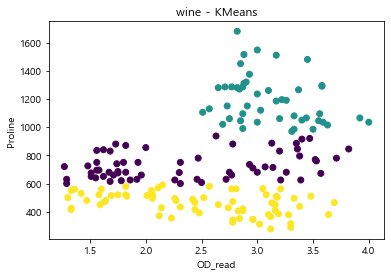

In [42]:
km = KMeans(3)
km_cluster = km.fit_predict(wine_df)
#시각화
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_cluster)
plt.title('wine - KMeans')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### 계층적 군집분석

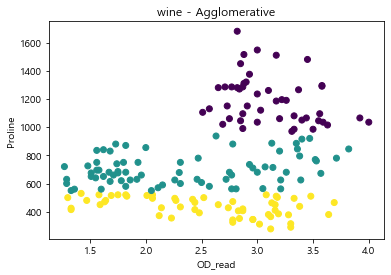

In [43]:
a = AgglomerativeClustering(3, linkage='ward')
a_cluster = a.fit_predict(wine_df)
#시각화
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=a_cluster)
plt.title('wine - Agglomerative')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### 실루엣 지수

- 얼마나 클러스터에 데이터가 잘 맞는지를 분석해주는 지표
- 이 값은 -1에서 1까지 숫자로 나타남
- 만약에 이 값이 1에 가까울수록 완벽하게 클러스터가 구분이 됐다는 뜻

In [44]:
print('실루엣 지수')
print('K-Means : ' , silhouette_score(wine_df, km_cluster))
print('Agg : ', silhouette_score(wine_df, a_cluster))

실루엣 지수
K-Means :  0.5809421087616886
Agg :  0.5651908644787632


### DBSCAN & K-Means 비교

In [45]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
iris = load_iris()
#데이터프레임화
data = pd.DataFrame(iris.data, columns=iris.feature_names)
labels = pd.DataFrame(iris.target, columns=['labels'])
#데이터프레임 합치기
data = pd.concat([data, labels], axis=1)

#DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
pred = pd.DataFrame(dbscan.fit_predict(data))
pred.columns = ['predict']

#데이터프레임 합치기
r = pd.concat([data, pred], axis=1)
r.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


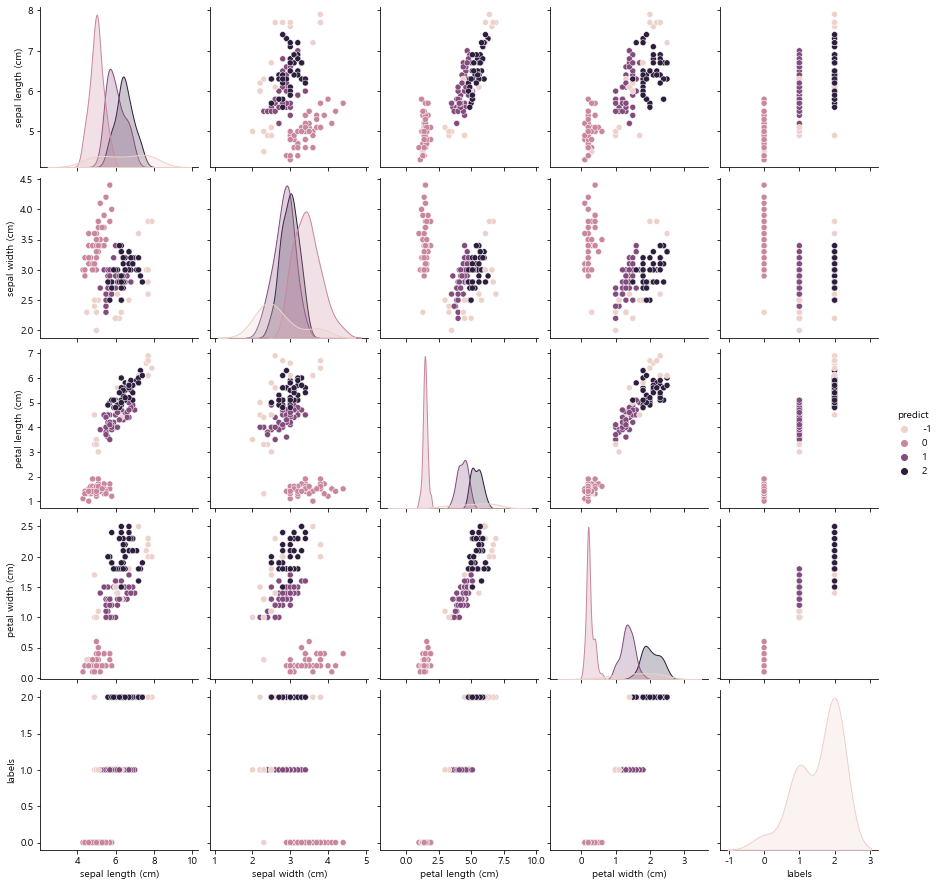

In [47]:
#예측값 pair plot
sns.pairplot(r, hue='predict')

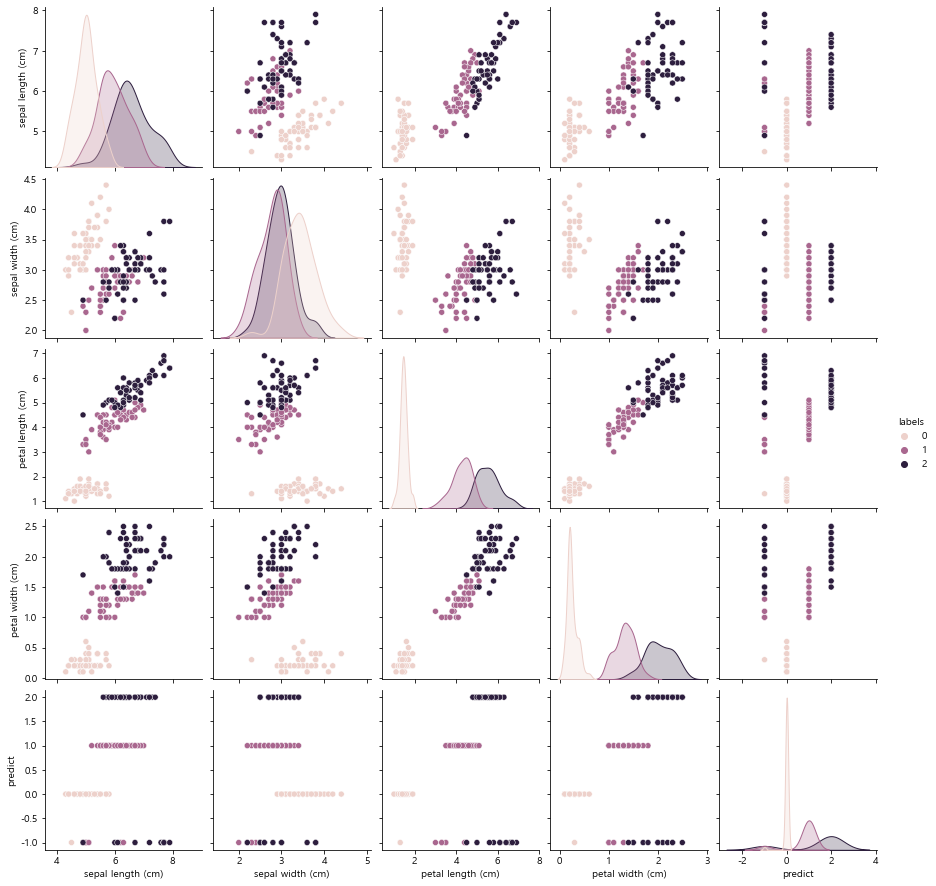

In [48]:
#실제값 pair plot
sns.pairplot(r, hue='labels')
plt.show()

### K-Means

In [49]:
from sklearn.cluster import KMeans

In [50]:
#학습
km = KMeans(n_clusters=3, random_state=21)
km.fit(data)
#데이터프레임화
new_labels = pd.DataFrame(km.labels_)
new_labels.columns = ['predict']
#데이터 프레임 합치기
r2 = pd.concat([data, new_labels], axis=1)
r2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,predict
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


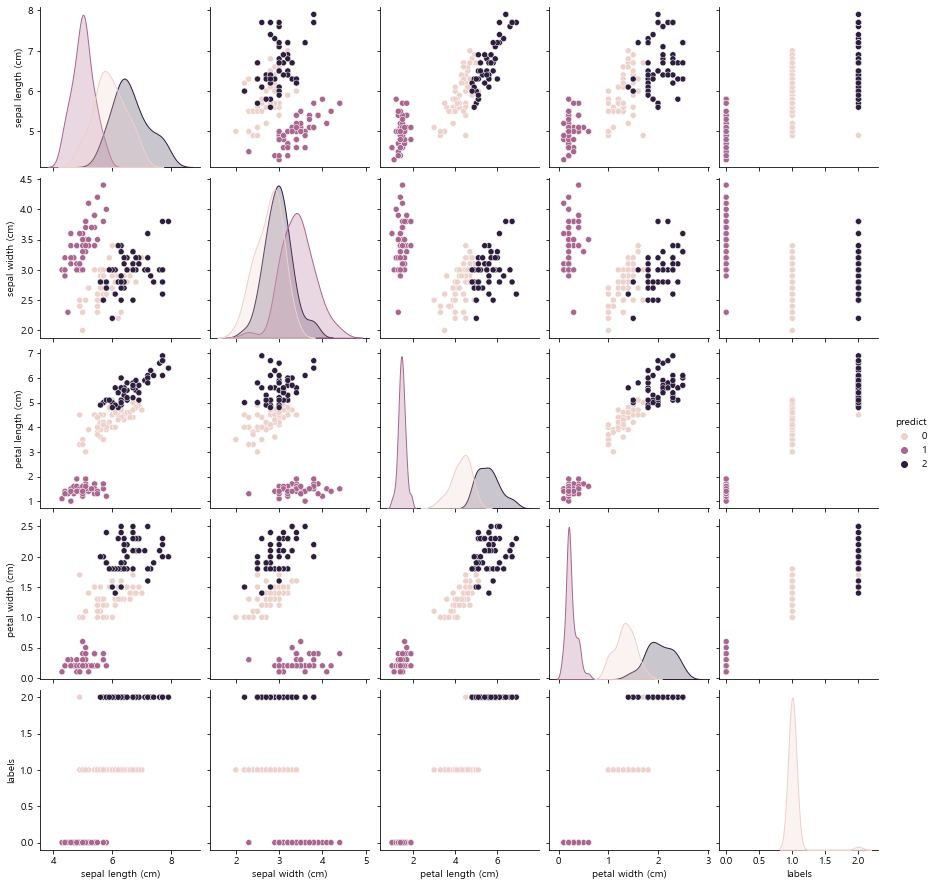

In [51]:
#pairplot 예측
sns.pairplot(r2, hue='predict')

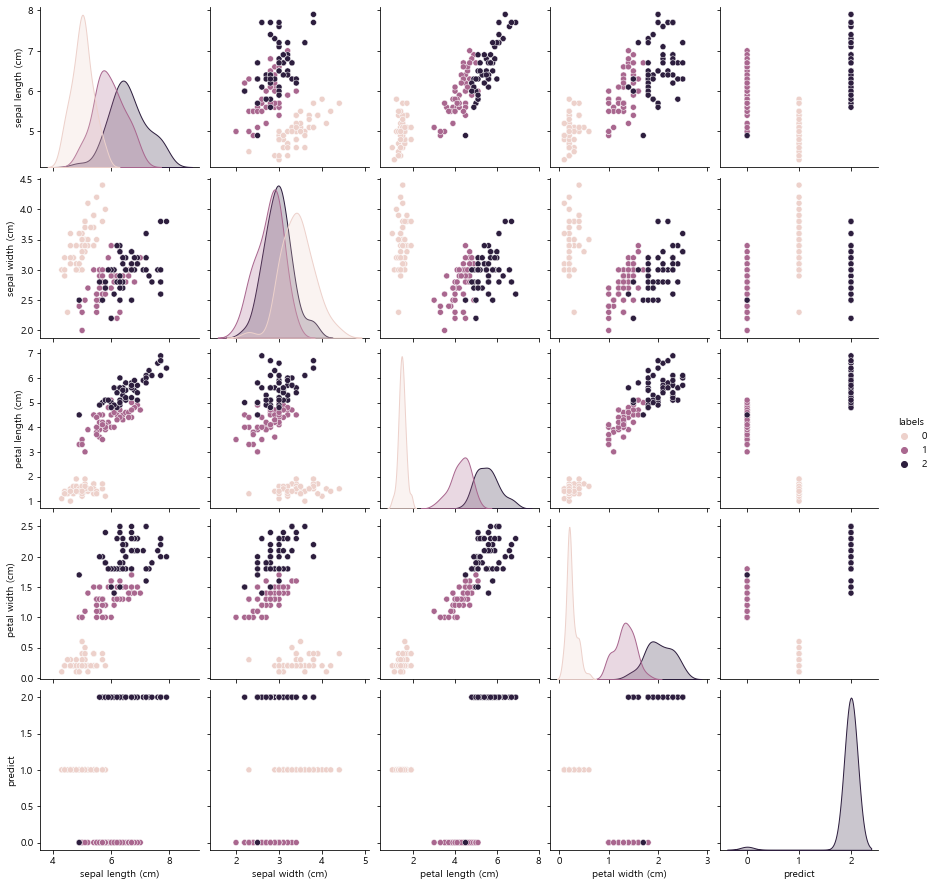

In [52]:
#실제값 pair plot
sns.pairplot(r2, hue='labels')
plt.show()

- pair plot을 봤을때, 아이리스 데이터에서는 k-Mean 가 DBSCAN보다 군집 분석을 실제값과 비슷하게 뽑음
- 아이리스 데이터에 한정해서 k-Means 성능이 더 좋음
- 지도학습 모델들처럼 군집분석모델도 항상 가장 좋은 모델은 없다.
- 각각의 데이터들의 특성에 맞춰 모델을 사용해야함

### 군집 알고리즘 비교와 평가

In [53]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, linkage
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

#### 타겟값으로 군집 평가

ARI / NMI : 군집이 최적일때 점수를 1로주고, 무작위로 분류된 군집일 경우 점수를 0으로 줌, 0 - 1 사이의 값으로 줌

** ARI 점수가 음수로 나올수도 있음

In [54]:
from sklearn.metrics.cluster import adjusted_rand_score

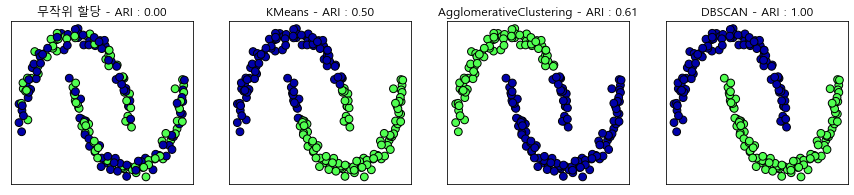

In [55]:
from sklearn import cluster
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

#스케일링
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

#군집분석 알고리즘 모델 리스트
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
#그림그리기
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                         subplot_kw={'xticks':(), 'yticks':()})
#군집 분석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당한 것
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=(len(x_scaled)))

# 무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:, 0], x_scaled[:,1], c= random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors = 'black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(
adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms) :
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters,
    cmap=mglearn.cm3, s=60, edgecolors = 'black')
    ax.set_title('{} - ARI : {:.2f}'.format(algorithm.__class__.__name__,
                                            adjusted_rand_score(y, clusters)))

- 군집분석에서는 acciracy 사용하면 안됨
- ARI / NMI 를 사용해야함.

In [56]:
from sklearn.metrics import accuracy_score
#위치에 상관없이 군집안에 같은 값이있으면 됨
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]
print('정확도 : {:.2f}'.format(accuracy_score(cluster1, cluster2)))
print('ARI : {:.2f}'.format(adjusted_rand_score(cluster1, cluster2)))

정확도 : 0.00
ARI : 1.00


#### 실루엣 지수
- 이 지표는 좀 정확하지 않은 점수
- 클러스터의 밀집정도를 계산하는 값
- 점수가 높을수록 좋고 최대점수 1
- 데이터가 복잡할 때는 밀집도를 활용한 점수가 잘 안맞음
- 실루엣 지수 -1일때 완전 잘못된 군집 0일때 중첩된 군집, 1일때 잘 구분된 군집

In [57]:
from sklearn.metrics.cluster import silhouette_score

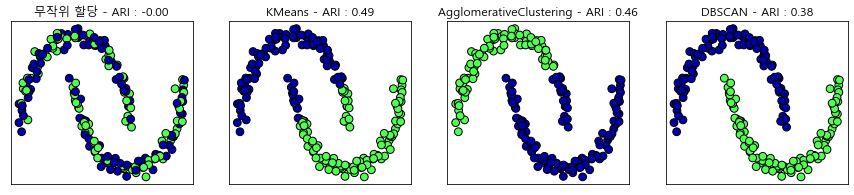

In [58]:
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                         subplot_kw={'xticks':(), 'yticks':()})
#군집 분석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당한 것
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=(len(x_scaled)))

# 무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:, 0], x_scaled[:,1], c= random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors = 'black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(
silhouette_score(x_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms) :
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters,
    cmap=mglearn.cm3, s=60, edgecolors = 'black')
    ax.set_title('{} - ARI : {:.2f}'.format(algorithm.__class__.__name__,
                                            silhouette_score(x_scaled, clusters)))

군집모델이 안정적이거나 실루엣 점수가 높다고 하더라도, 군집에 어떤 유의미한것이
있는지나 군집이 데이터의 흥미로운 feature를 반영하고 있는지 알수없음
- 실루엣 잘 작동 X

### 비지도학습 내용 총사용 코드

In [59]:
import pandas as pd
import numpy as np

In [60]:
c = pd.read_csv('customer_join.csv')
ul = pd.read_csv('use_log.csv')

In [61]:
ul.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [62]:
c.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
amax                0
amin                0
flag1               0
cal_date            0
star_date           0
mem_period          0
dtype: int64

#### 클러스터 사용 - K-Means

- 군집개수 : 4개
- mean, median, min, max 변수는 월 이용 횟수와 관련된 변수 : 1 ~ 8 사이의 값을 가짐
- 이에 반해 mem_period 단위가 너무 크니까 scaling 

In [63]:
cc = c[['mean', 'median', 'amax', 'amin', 'mem_period']]
cc.head()

,mean,median,amax,amin,mem_period
0,4.833333,5.0,8,2,47.968131
1,5.083333,5.0,7,3,47.968131
2,4.583333,5.0,6,3,47.968131
3,4.833333,4.5,7,2,47.968131
4,3.916667,4.0,6,1,47.968131


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [65]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cc)
x_scaled = pd.DataFrame(x_scaled, columns=['mean', 'median', 'max', 'min', 'mem_period'])
x_scaled.head()

,mean,median,max,min,mem_period
0,-0.281206,-0.133676,0.081177,-0.533620,2.031859
1,-0.140545,-0.133676,-0.379928,-0.021149,2.031859
2,-0.421867,-0.133676,-0.841034,-0.021149,2.031859
3,-0.281206,-0.400393,-0.379928,-0.533620,2.031859
4,-0.796964,-0.667109,-0.841034,-1.046090,2.031859


In [66]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(x_scaled)

In [67]:
cc['cluster'] = clusters.labels_
cc.head()

C:\Users\82104\AppData\Local\Temp\ipykernel_4568\691509906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['cluster'] = clusters.labels_


,mean,median,amax,amin,mem_period,cluster
0,4.833333,5.0,8,2,47.968131,1
1,5.083333,5.0,7,3,47.968131,1
2,4.583333,5.0,6,3,47.968131,1
3,4.833333,4.5,7,2,47.968131,1
4,3.916667,4.0,6,1,47.968131,1


In [68]:
#열이름 바꾸기
cc.rename(columns={'mean':'월 평균', 'median' : '월별 중간값', 'amax' : '월별 최대값', 
                   'amin' : '월별 최소값', 'mem_period' : '회원기간'}, inplace=True)
cc.head()

C:\Users\82104\AppData\Local\Temp\ipykernel_4568\1507651625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc.rename(columns={'mean':'월 평균', 'median' : '월별 중간값', 'amax' : '월별 최대값',


,월 평균,월별 중간값,월별 최대값,월별 최소값,회원기간,cluster
0,4.833333,5.0,8,2,47.968131,1
1,5.083333,5.0,7,3,47.968131,1
2,4.583333,5.0,6,3,47.968131,1
3,4.833333,4.5,7,2,47.968131,1
4,3.916667,4.0,6,1,47.968131,1


In [69]:
#cluster 기준으로 데이터 개수 세기
cc.groupby('cluster').count()

,월 평균,월별 중간값,월별 최대값,월별 최소값,회원기간
cluster,,,,,
0,846,846,846,846,846
1,1251,1251,1251,1251,1251
2,759,759,759,759,759
3,1336,1336,1336,1336,1336


그룹 3번에 해당하는 수가 1336명으로 가장 많으며, 다음이 그룹1, 그룹0, 그룹2 순으로
사람이 많음

In [70]:
#군집별 특징 확인
cc.groupby('cluster').mean()

,월 평균,월별 중간값,월별 최대값,월별 최소값,회원기간
cluster,,,,,
0,8.054608,8.039598,10.009456,6.160757,7.809637
1,4.676091,4.670264,7.231815,2.153477,37.819727
2,3.049270,2.882740,4.745718,1.652174,10.147960
3,5.522518,5.373129,8.743263,2.686377,15.688428


#### 차원축소
- feature가 5개니까 2차원으로 줄여보자

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

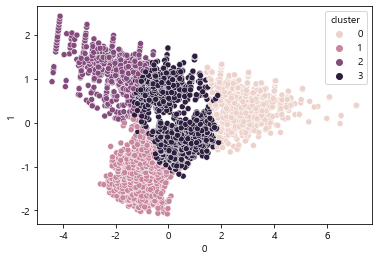

In [72]:
#카피
x = x_scaled.copy()
#모델정의(2차원)
pca = PCA(n_components=2)
#학습, 변환
x_pca = pca.fit_transform(x)

#데이터 프레임 형태로 변경
pca_x = pd.DataFrame(x_pca)
#컬럼추가
pca_x['cluster'] = cc['cluster']

#시각화
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_x)

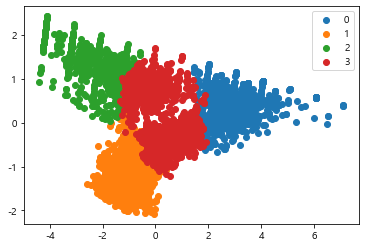

In [73]:
#유니크값 정리, 시각화
for i in sorted(pca_x['cluster'].unique()):
    #해당하는 클러스터 번호일 때 그림을 그리고, for 문을 실행하면서 그려진 그림 위에 덧그림
    tmp = pca_x.loc[pca_x['cluster']==i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_x['cluster'].unique()))

클러스터가 잘 나눠져있는 것 같으니까 pca가 정보를 잘 보존한채 깔끔하게 데이터의 차원을
축소해준 것을 알 수 있음

-> 차원축소가 잘되지 않았을 경우(주성분의 개수가 적절하지 않았을 경우), 그래프의
데이터들이 겹쳐져서 그려지게 됨

### 클러스터 별 회원 특징 파악 - 탈퇴, 정기이용 여부

In [74]:
cc_join = pd.concat([cc, c], axis=1)
cc_join.head()

,월 평균,월별 중간값,월별 최대값,월별 최소값,회원기간,cluster,customer_id,name,class,gender,...,price,campaign_name,mean,median,amax,amin,flag1,cal_date,star_date,mem_period
0,4.833333,5.0,8,2,47.968131,1,OA832399,XXXX,C01,F,...,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,2015-05-01,47.968131
1,5.083333,5.0,7,3,47.968131,1,PL270116,XXXXX,C01,M,...,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,2015-05-01,47.968131
2,4.583333,5.0,6,3,47.968131,1,OA974876,XXXXX,C01,M,...,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,2015-05-01,47.968131
3,4.833333,4.5,7,2,47.968131,1,HD024127,XXXXX,C01,F,...,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,2015-05-01,47.968131
4,3.916667,4.0,6,1,47.968131,1,HD661448,XXXXX,C03,F,...,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,2015-05-01,47.968131


In [78]:
# 탈퇴한 회원들의 groupby
newdf = cc_join.groupby(['cluster','is_deleted'], 
                        as_index=False).count()[['cluster','is_deleted','customer_id']]
newdf

,cluster,is_deleted,customer_id
0,0,0,827
1,0,1,19
2,1,0,1230
3,1,1,21
4,2,1,759
5,3,0,785
6,3,1,551


In [79]:
len(cc_join[cc_join['cluster'] == 2])

759

In [85]:
# 클러스터 및 탈퇴여부별 고객 비율 뽑기
d0 = (newdf['is_deleted']==0) #스포츠센터를 지속적으로 사용하고 있는 회원
d1 = (newdf['is_deleted']==1) #탈퇴회원

#반복문으로 비율 뽑기
for i in range(0,4) :
    tmp = (newdf['cluster']==i)
    print('cluster'+str(i)+'의 탈퇴회원 비율은'+
          str(round((newdf.loc[(tmp&d1),'customer_id'].sum()/newdf.loc[tmp, 'customer_id'].sum())*100, 2)) + '%')
    print('cluster'+str(i)+'의 유지회원 비율은'+
          str(round((newdf.loc[(tmp&d0),'customer_id'].sum() / newdf.loc[tmp,'customer_id'].sum())*100,2))+'%')


cluster0의 탈퇴회원 비율은2.25%
cluster0의 유지회원 비율은97.75%
cluster1의 탈퇴회원 비율은1.68%
cluster1의 유지회원 비율은98.32%
cluster2의 탈퇴회원 비율은100.0%
cluster2의 유지회원 비율은0.0%
cluster3의 탈퇴회원 비율은41.24%
cluster3의 유지회원 비율은58.76%


- 클러스터 0, 1 : 유지회원 > 탈퇴회원
- 클러스터 2 : 모두 탈퇴
- 클러스터 3 : 유지회원이랑 탈퇴회원이랑 비율이 그나마 비슷
-
- 그룹0 : 평균기간이 7일로 가장 짧고 월평균 횟수는 8회로 가장 높음
- 그룹1,3 : 평균 회원기간이 다른 그룹보단 길지만, 월평균 횟수는 1은 그룹3보다 회원유지 기간은 길지만 월평균 이용횟수는 적음
- 그룹2 : 평균 회원유지기간이 다른 그룹보다는 짧음, 평균이용회수도 3회로 가장 낮음
- -> 이런식으로 그룹별 특징을 정의해서 프로모션할 때 사용 가능할지도..?

- 클러스터 0은 평균 회원이 가장 짧고, 월 평균 이용회수가 가장 높음
- 클러스터 2는 평균 회원기간도 짧고, 월평균 이용횟수가 적음
- 클러스터 1, 3의 평균 회원유지기간이 클러스터 0이랑 2번보다는 길다
- 클러스터 1은 클러스터3보다 회원기간이 길지만 이용횟수는 적은편이다.

#### <정리>
- 클러스터0 : 초반에 열심히 이용한 그룹(이용횟수가 많고 유지회원이 많음, 그러나 평균 회원기간이 짧아서 처음에만 열심히 이용)
- 클러스터1 : 안정적인 그룹(회원유지기간이 길고, 이용횟수는 적음, 그러나 유지하는 회원은 많음)
- 클러스터2 : 가장 안좋은 탈퇴자 그룹(100%탈퇴한그룹, 가장 기간도 짧고 다 탈퇴함)
- 클러스터3 : 회원유지 기간이 길고, 탈퇴회원이랑 지속회원이 비슷한 그룹

### 정기이용 여부 확인

In [94]:
#정기이용 고객groupby
newdf2 = cc_join.groupby(['cluster', 'flag1'], 
                         as_index=False).count()[['cluster', 'flag1', 'customer_id']]
#정기이용 고객 비율 뽑기
flag0 = (newdf2['flag1']==0) #정기적으로 사용하지 않는 회원
flag1 = (newdf2['flag1']==1) #정기적으로 이용하는 회원

#반복문으로 비율 뽑기
for i in range(0,4) :
    tmp = (newdf2['cluster']==i)
    print('cluster'+str(i)+'의 정기회원의 비율은'+
          str(round((newdf2.loc[(tmp&flag1), 'customer_id'].sum() 
                     /newdf2.loc[tmp, 'customer_id'].sum())*100, 2))+'%')
    print('cluster'+str(i)+'의 비정기회원의 비율은'+
          str(round((newdf2.loc[(tmp&flag0), 'customer_id'].sum() 
                     / newdf2.loc[tmp, 'customer_id'].sum())*100, 2))+'%')


cluster0의 정기회원의 비율은93.85%
cluster0의 비정기회원의 비율은6.15%
cluster1의 정기회원의 비율은99.84%
cluster1의 비정기회원의 비율은0.16%
cluster2의 정기회원의 비율은34.65%
cluster2의 비정기회원의 비율은65.35%
cluster3의 정기회원의 비율은82.86%
cluster3의 비정기회원의 비율은17.14%


- 클러스터0 : 초반에 불타오르는 그룹(정기 94%, 비정기 6%)
- 클러스터1 : 안정적인 그룹(정기적 99%, 비정기적0.1%)
- 클러스터2 : 가장 이용이 적은 그룹(정기 35%, 비정기 65%)
- 클러스터3 : 유지와 탈퇴의 비율이 비슷한 그룹(정기 83%, 비정기 17%)